In [ ]:
ENV='colab'
if ENV == 'colab':
    !git clone https://github.com/ai-in-actiune/tree-counting-and-classification-in-images.git
    !pip install -r tree-counting-and-classification-in-images/requirements.txt
    !pip install --upgrade opencv-python setuptools==59.5.0 albumentations==1.0.3

In [16]:
import os
import time
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import torch
from deepforest import main 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d = main.deepforest.load_from_checkpoint('/content/drive/MyDrive/copaci/deepforest_apples_2/checkpoint-15.pl', map_location=torch.device('cpu'))

In [18]:
im = cv2.imread('/content/drive/MyDrive/copaci/valid/m35.jpg')

In [ ]:
plt.imshow(im)

In [20]:
def predict(path, model):
  im = cv2.imread(path)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  prediction = pd.DataFrame(model.predict_image(im))
  for i in range(prediction.shape[0]-1):
    x1 = int(prediction.T[i]['xmin'])
    y1 = int(prediction.T[i]['ymin'])
    x2 = int(prediction.T[i]['xmax'])
    y2 = int(prediction.T[i]['ymax'])

    cv2.rectangle(im, (x1, y1), (x2, y2), ((1-prediction.T[i]['score'])*255, prediction.T[i]['score']*255, 255), int(im.shape[0]/120/(1/(.8 + .003*im.shape[0]/100))))
  return prediction.shape[0], im

/usr/local/lib/python3.10/dist-packages/deepforest/main.py:283: UserWarning: Image type is uint8, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn(f"Image type is {image.dtype}, transforming to float32. "


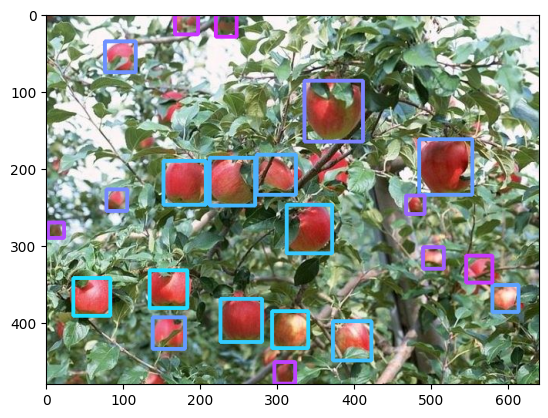

In [22]:
s, i = predict('/content/drive/MyDrive/copaci/valid/m35.jpg', d)
plt.imshow(i)